This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables: Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.Age: Positive Integer variable of the reviewers age. Title: String variable for the title of the review.Review Text: String variable for the review body. Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended. Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.Division Name: Categorical name of the product high level division. Department Name: Categorical name of the product department name.Class Name: Categorical name of the product class name.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'wc.csv')
data.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
data.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
data.shape

(23486, 11)

In [7]:
data.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


# DATA PREPROCESSING

In [8]:
data.isna().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [9]:
data.drop('Title',inplace=True,axis=1)

In [10]:
data.isna().sum()


Unnamed: 0                   0
Clothing ID                  0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [12]:
#dropping the records where review text is null.
data=data[~data['Review Text'].isnull()]
data.isna().sum()

Unnamed: 0                  0
Clothing ID                 0
Age                         0
Review Text                 0
Rating                      0
Recommended IND             0
Positive Feedback Count     0
Division Name              13
Department Name            13
Class Name                 13
dtype: int64

In [15]:
#Filling the missing values in Division Name, Department Name and Class Name using their respective mode.
def fillna(data,col):
    return data[col].fillna(data[col].mode()[0],inplace=True)
missing_cols=["Division Name","Department Name","Class Name"]
for i in missing_cols:
    fillna(data,i)
data.isna().sum()

Unnamed: 0                 0
Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

# Numeric Columns

In [16]:
num_cols=[features for features in data.columns if data[features].dtypes !='O']
num_cols

['Unnamed: 0',
 'Clothing ID',
 'Age',
 'Rating',
 'Recommended IND',
 'Positive Feedback Count']

In [17]:
data[num_cols]

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
0,0,767,33,4,1,0
1,1,1080,34,5,1,4
2,2,1077,60,3,0,0
3,3,1049,50,5,1,0
4,4,847,47,5,1,6
...,...,...,...,...,...,...
23481,23481,1104,34,5,1,0
23482,23482,862,48,3,1,0
23483,23483,1104,31,3,0,1
23484,23484,1084,28,3,1,2


In [18]:
data[num_cols].nunique()

Unnamed: 0                 22641
Clothing ID                 1179
Age                           77
Rating                         5
Recommended IND                2
Positive Feedback Count       82
dtype: int64

In [19]:
import warnings
warnings.filterwarnings('ignore')

# Outliers

<AxesSubplot:xlabel='Clothing ID', ylabel='Density'>

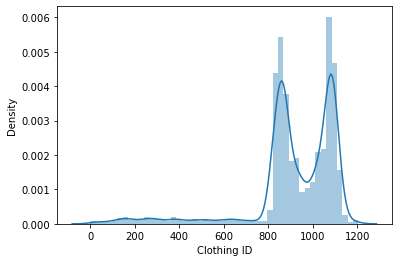

In [21]:
sns.distplot(data['Clothing ID'])

<AxesSubplot:xlabel='Clothing ID'>

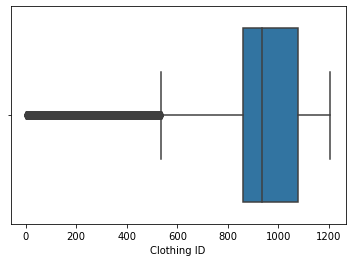

In [22]:
sns.boxplot(data['Clothing ID'])


<AxesSubplot:xlabel='Age', ylabel='Density'>

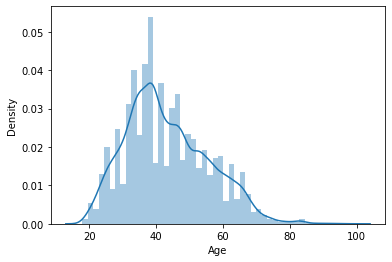

In [23]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='Age'>

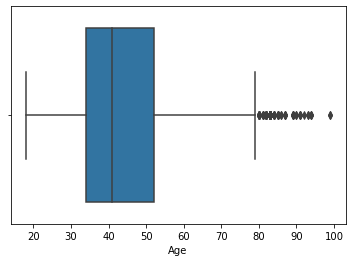

In [24]:
sns.boxplot(data['Age'])

<AxesSubplot:xlabel='Rating', ylabel='count'>

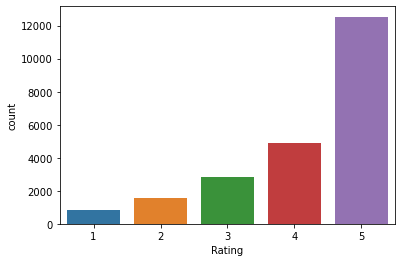

In [25]:
sns.countplot(data['Rating'])

<AxesSubplot:xlabel='Rating'>

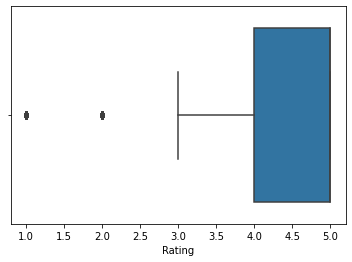

In [26]:
sns.boxplot(data['Rating'])

<AxesSubplot:xlabel='Recommended IND', ylabel='count'>

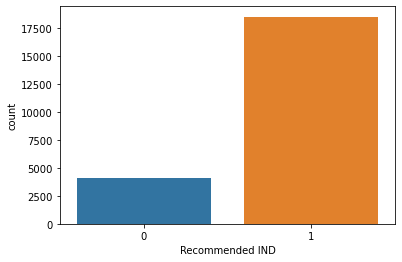

In [27]:
sns.countplot(data['Recommended IND'])

<AxesSubplot:xlabel='Recommended IND'>

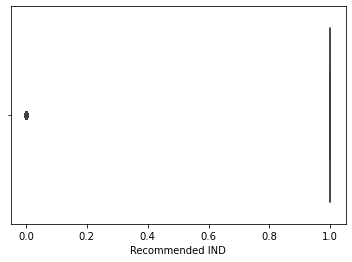

In [28]:
sns.boxplot(data['Recommended IND'])

<AxesSubplot:xlabel='Positive Feedback Count', ylabel='Density'>

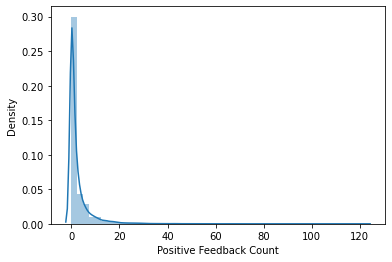

In [29]:
sns.distplot(data['Positive Feedback Count'])

<AxesSubplot:xlabel='Positive Feedback Count'>

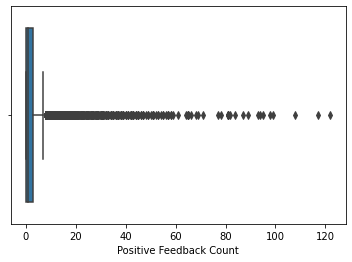

In [30]:
sns.boxplot(data['Positive Feedback Count'])

# Handling Outliers

In [31]:
Q1=np.percentile(data['Clothing ID'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Clothing ID'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Clothing ID'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

861.0
936.0
1078.0
535.5
1403.5


In [32]:
outlier = []
for x in data["Clothing ID"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[4, 89, 368, 368, 368, 126, 523, 329, 305, 127, 127, 127, 127, 127, 127, 149, 149, 204, 252, 252, 117, 117, 252, 252, 252, 252, 252, 252, 252, 117, 252, 252, 117, 245, 245, 2, 299, 80, 154, 154, 154, 158, 154, 154, 154, 154, 154, 154, 197, 59, 235, 59, 235, 230, 442, 442, 442, 411, 411, 411, 411, 411, 424, 485, 424, 115, 115, 434, 178, 225, 225, 225, 398, 225, 225, 431, 225, 34, 481, 481, 481, 481, 481, 481, 481, 371, 206, 321, 164, 164, 63, 160, 146, 146, 146, 146, 129, 129, 129, 129, 129, 418, 129, 418, 129, 129, 129, 517, 132, 132, 132, 132, 176, 248, 176, 248, 176, 176, 248, 176, 341, 341, 96, 14, 18, 282, 282, 282, 52, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 52, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 282, 21, 491, 521, 486, 486, 20, 212, 429, 288, 302, 302, 505, 505, 374, 153, 505, 505, 374, 374, 374, 374, 285, 506, 412, 506, 506, 506, 506, 380, 380, 380, 380, 380, 512, 380, 422, 422, 422, 458, 468, 433, 4

In [33]:
ind_1 =data["Clothing ID"]<low_limit
data.loc[ind_1].index

Int64Index([   29,    43,    56,    59,    61,   138,   157,   171,   216,
              382,
            ...
            23425, 23435, 23438, 23449, 23457, 23461, 23463, 23469, 23471,
            23476],
           dtype='int64', length=1417)

<AxesSubplot:xlabel='Clothing ID'>

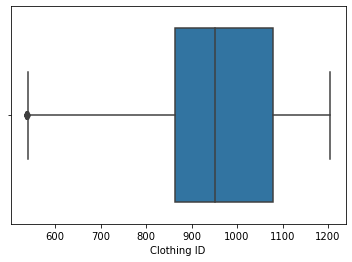

In [35]:
data.drop(data.loc[ind_1].index,inplace =True)
sns.boxplot(data['Clothing ID'])

In [36]:
#age
Q1=np.percentile(data['Age'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Age'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Age'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

34.0
41.0
52.0
7.0
79.0


In [37]:
outlier = []
for x in data["Age"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[83, 83, 83, 80, 82, 82, 83, 82, 85, 80, 85, 83, 84, 83, 83, 80, 83, 80, 80, 83, 84, 82, 82, 83, 81, 90, 85, 94, 83, 83, 86, 80, 85, 82, 89, 80, 99, 83, 83, 83, 82, 81, 91, 83, 83, 80, 91, 83, 80, 84, 83, 99, 82, 82, 83, 87, 83, 90, 83, 82, 82, 92, 91, 83, 83, 82, 85, 83, 85, 84, 83, 89, 93, 81, 94, 94, 83, 83, 82, 83, 91, 83, 83, 83, 83, 83, 87, 83, 81, 81, 83, 83, 84, 83, 83, 84, 80, 87, 83, 86]


In [38]:
ind_2=data["Age"]>upper_limit
data.loc[ind_2].index

Int64Index([   95,   234,   277,   628,   846,   958,  1006,  1036,  1188,
             1199,  1616,  2006,  2119,  2447,  3069,  3291,  3301,  3596,
             3810,  3820,  4418,  4968,  5368,  5371,  5469,  5901,  5909,
             6543,  6763,  6829,  6973,  7147,  7292,  7346,  8078,  8109,
             8327,  8718,  8877,  9085,  9161,  9437,  9513,  9815,  9896,
            10470, 10617, 10805, 11181, 11245, 11364, 11545, 11692, 11947,
            12003, 12581, 12612, 12631, 13022, 13383, 14404, 14997, 15802,
            16163, 16190, 16318, 16323, 16713, 16780, 17303, 17401, 17412,
            17578, 17611, 18036, 18563, 18894, 18963, 19179, 19257, 19304,
            19470, 20043, 20077, 20413, 20460, 21254, 21437, 21719, 22085,
            22129, 22228, 22421, 22435, 22436, 22552, 22640, 22716, 22773,
            23033],
           dtype='int64')

<AxesSubplot:xlabel='Age'>

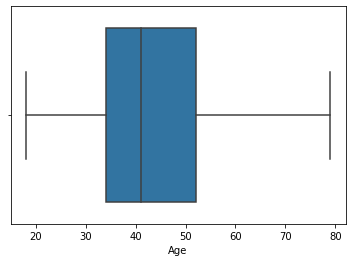

In [39]:
data.drop(data.loc[ind_2].index,inplace =True)
sns.boxplot(data['Age'])

In [40]:
#POSITIVE FEEDBACK COUNT

Q1=np.percentile(data['Positive Feedback Count'],25, interpolation ='midpoint')
print(Q1)
Q2=np.percentile(data['Positive Feedback Count'],50, interpolation ='midpoint')
print(Q2)
Q3=np.percentile(data['Positive Feedback Count'],75, interpolation ='midpoint')
print(Q3)
IQR =Q3-Q1
IQR
low_limit = Q1-1.5*IQR
print(low_limit)
upper_limit =Q3+1.5*IQR
print(upper_limit)

0.0
1.0
3.0
-4.5
7.5


In [41]:
outlier = []
for x in data["Positive Feedback Count"]:
    if ((x>upper_limit) or (x<low_limit)):
        outlier.append(x)
print(outlier)

[14, 14, 9, 34, 9, 10, 9, 17, 9, 11, 11, 24, 12, 9, 8, 9, 8, 9, 9, 17, 10, 14, 13, 8, 20, 11, 16, 8, 23, 13, 17, 9, 15, 17, 10, 13, 11, 9, 20, 9, 11, 9, 14, 19, 10, 15, 11, 8, 29, 32, 12, 30, 11, 12, 11, 8, 8, 55, 10, 17, 84, 12, 11, 9, 14, 27, 14, 8, 43, 11, 15, 14, 21, 42, 29, 12, 8, 12, 14, 24, 15, 37, 13, 17, 11, 9, 9, 11, 11, 10, 8, 12, 12, 12, 10, 11, 9, 11, 15, 8, 10, 14, 13, 11, 9, 8, 8, 17, 12, 9, 30, 10, 8, 8, 34, 55, 10, 71, 9, 19, 10, 14, 16, 9, 11, 35, 65, 8, 117, 19, 8, 8, 16, 33, 9, 9, 10, 9, 8, 13, 8, 21, 19, 24, 17, 8, 8, 12, 15, 15, 14, 8, 9, 15, 20, 8, 11, 18, 12, 33, 11, 25, 12, 12, 13, 20, 10, 27, 10, 8, 8, 17, 10, 47, 12, 9, 13, 16, 14, 13, 15, 10, 11, 8, 37, 11, 24, 17, 8, 22, 13, 10, 12, 9, 51, 10, 19, 21, 14, 29, 8, 94, 10, 27, 15, 8, 9, 9, 11, 9, 9, 9, 31, 31, 9, 10, 30, 8, 18, 9, 77, 23, 61, 46, 8, 10, 14, 20, 11, 10, 26, 13, 24, 8, 19, 27, 9, 19, 8, 12, 9, 17, 12, 13, 28, 25, 28, 8, 8, 10, 14, 10, 9, 9, 9, 23, 16, 10, 42, 9, 26, 11, 46, 20, 17, 10, 12, 9, 27

In [42]:
ind_3=data["Positive Feedback Count"]>upper_limit
data.loc[ind_3].index

Int64Index([   10,    21,    44,    53,    66,    70,    87,    99,   103,
              106,
            ...
            23382, 23386, 23394, 23398, 23422, 23427, 23433, 23441, 23467,
            23485],
           dtype='int64', length=2042)

<AxesSubplot:xlabel='Positive Feedback Count'>

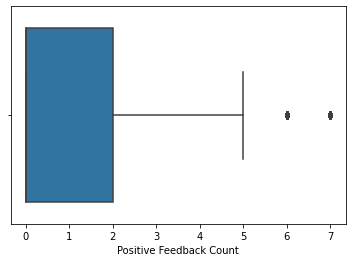

In [43]:
data.drop(data.loc[ind_3].index,inplace =True)
sns.boxplot(data['Positive Feedback Count'])

# EDA
Univariate Visualization

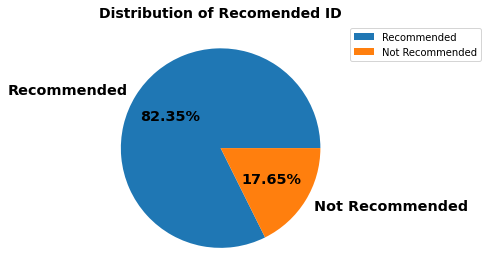

In [44]:
# Converting 0 & 1 in Not Recommended & Recommended
data.loc[data['Recommended IND'] == 0, 'Recommended IND'] = "Not Recommended" 
data.loc[data['Recommended IND'] == 1, 'Recommended IND'] = "Recommended"
plt.figure(figsize = (6,4))
x = data['Recommended IND'].value_counts()
labels = 'Recommended','Not Recommended'
plt.pie(x = x,  labels = labels,
        autopct = '%.2f%%', 
        textprops = {'size' : 'x-large',
                   'fontweight' : 'bold'})
plt.title('Distribution of Recomended ID', fontsize = 14, fontweight = 'bold')
plt.legend(labels, loc="upper left", bbox_to_anchor = (1,1))
plt.tight_layout()
plt.show()

In [45]:
#82% of the data we have been recommended to customers means the data is of good quality.

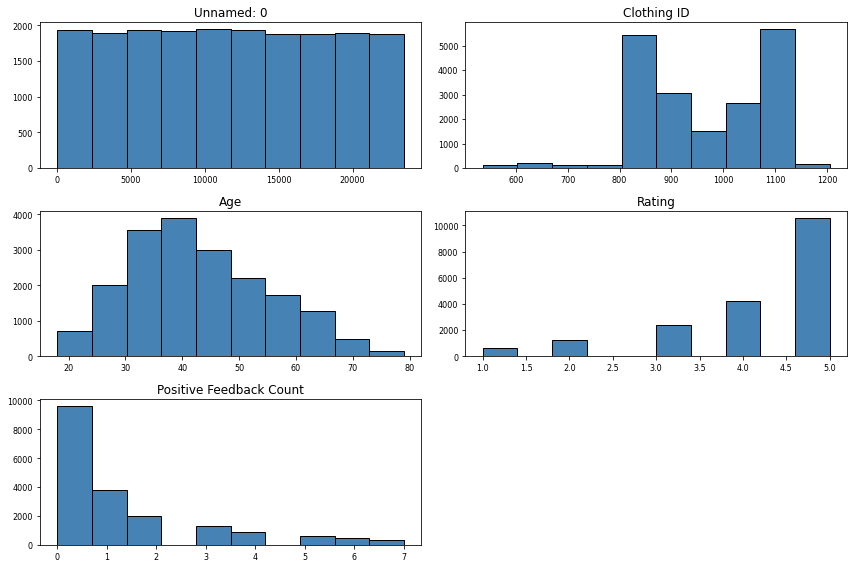

In [46]:
data.hist(bins=10, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2, 2))

In [48]:
#As we take a look at the graph Clothing Id has way more skewness.

#Age has skewness.

#Rating we do have a product that has fewer ratings but mostly data is in 5 ratings.

#Recommended IND Mostly product is Recommended to customer

UNIVARIATE VISUALIZATION FOR CATEGORICAL DATA

In [49]:
cat_cols= data[['Division Name', 'Department Name','Class Name']]
cat_cols

,Division Name,Department Name,Class Name
0,Initmates,Intimate,Intimates
1,General,Dresses,Dresses
2,General,Dresses,Dresses
3,General Petite,Bottoms,Pants
4,General,Tops,Blouses
...,...,...,...
23479,General Petite,Bottoms,Skirts
23481,General Petite,Dresses,Dresses
23482,General Petite,Tops,Knits
23483,General Petite,Dresses,Dresses


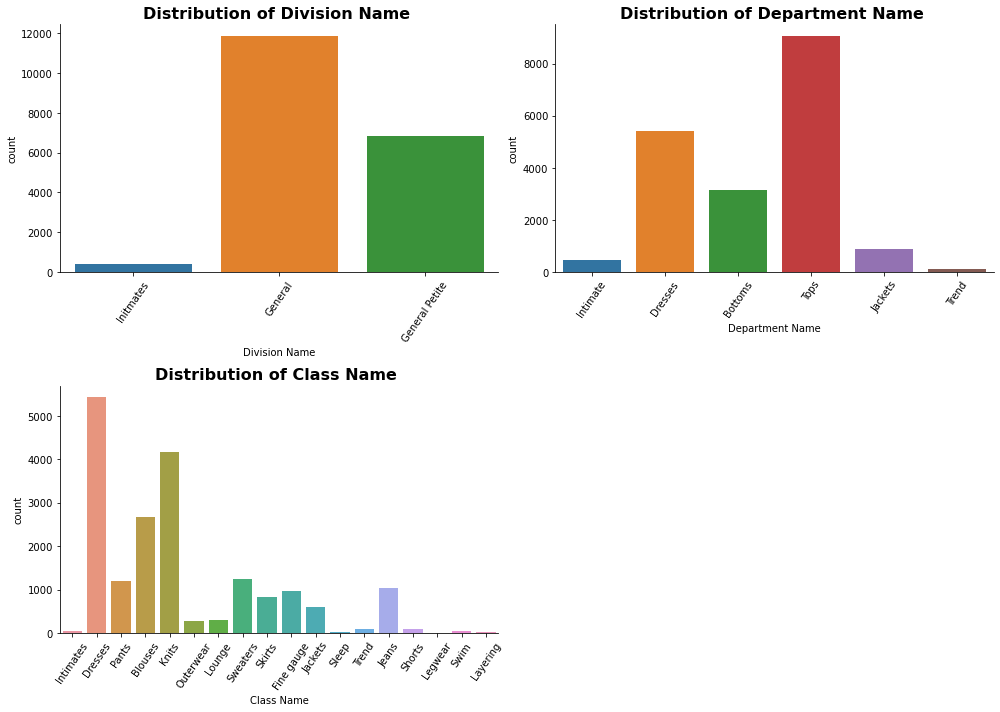

In [50]:
plt.figure(figsize=[14,10])
n=1
for x in cat_cols:
    plt.subplot(2,2,n)
    sns.countplot(x=data[x],data=data)
    sns.despine()
    plt.title("Distribution of {} ".format(x), fontsize=16, fontweight='bold')
    plt.xticks(rotation=55)
    n=n+1
plt.tight_layout()
plt.show()

In [51]:
#Division Name: General products are more in demand than intimate products

#Department Name: Most choose products are Tops & Dresses

#Class Name: Dresses, Knits, and Blouses are the most popular



Univariate distribution of clothing ID

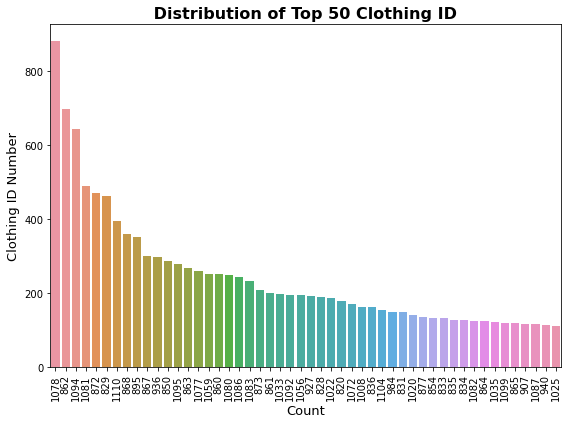

In [52]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x='Clothing ID', data = data, 
                   order = data['Clothing ID'].value_counts().index[:50])
plt.title(' Distribution of Top 50 Clothing ID ', fontsize = 16, fontweight = 'bold')
plt.xlabel('Count', fontsize = 13)
plt.xticks(rotation=90)
plt.ylabel('Clothing ID Number', fontsize = 13)
plt.tight_layout()
plt.show()

# Bivariate Visualization

Division, Department & Class Name Vs Recommended IND

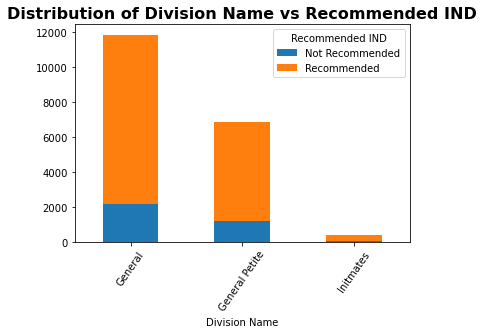

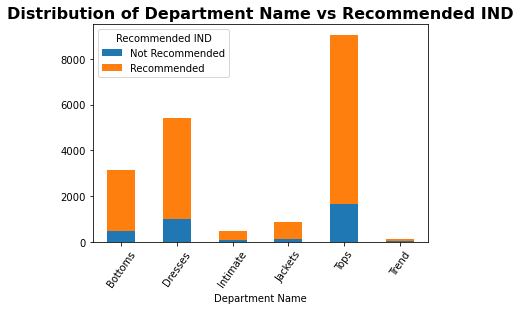

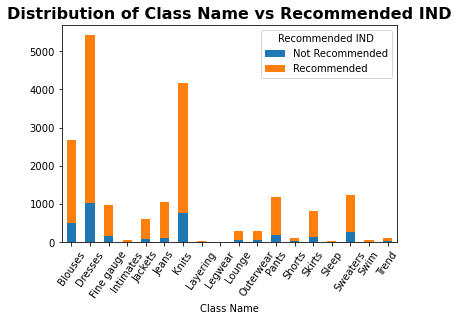

In [53]:
for x in cat_cols:
    y = pd.crosstab(data[x],data['Recommended IND'])
    y.div(y.sum(1).astype(float), axis=0)
    y.plot(kind='bar', stacked=True)
    plt.title("Distribution of {} vs Recommended IND".format(x), fontsize=16, fontweight='bold')
    plt.xticks(rotation=55)

In [54]:
#Division Name: Recommendation clothes are more for General products

#Department Name: Jackets are the only products which have less recommended compared to other clothes.

#Class Name: Interesting result is Trend clothes are only recommended we don't have any negative review.

Age, Positive Feedback Count Vs Recommended IND

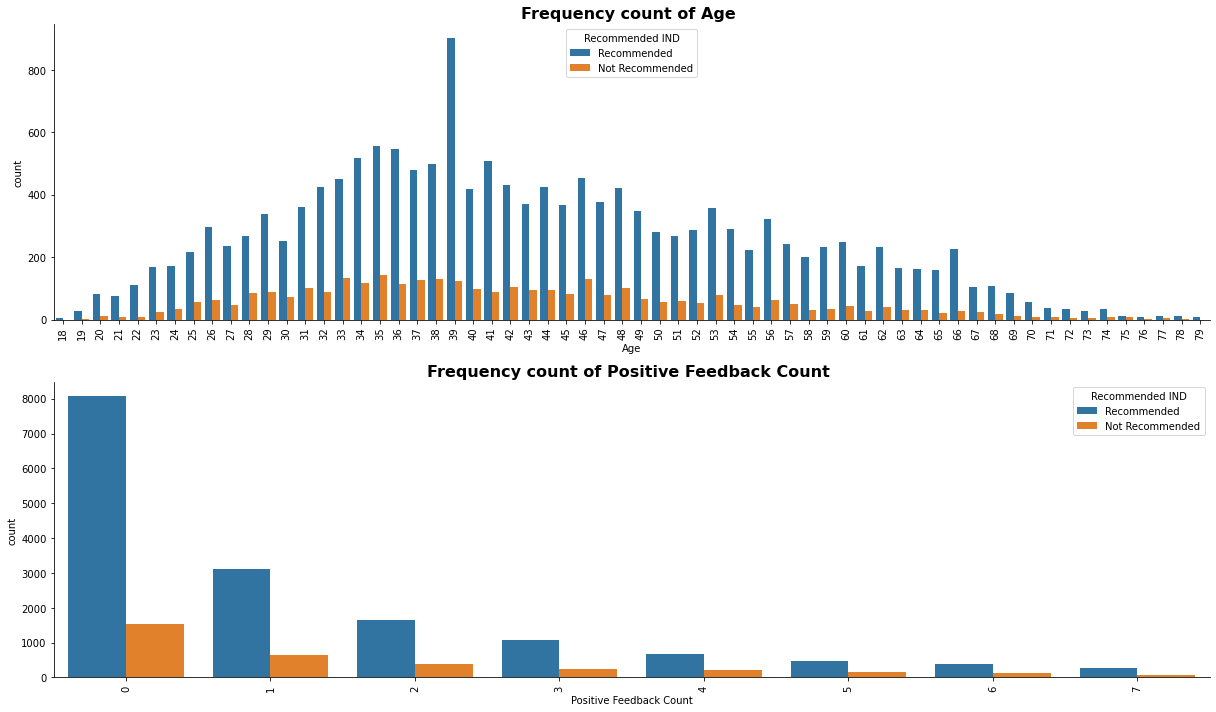

In [55]:
plt.figure(figsize=[17,10])
n=1
label = data[['Age', 'Positive Feedback Count']]
for x in label:
    plt.subplot(2,1,n)
    sns.countplot(x=data[x], hue='Recommended IND',data=data)
    sns.despine()
    plt.title("Frequency count of {} ".format(x), fontsize=16, fontweight='bold')
    plt.xticks(rotation=90)
    n=n+1
plt.tight_layout()
plt.show()

In [56]:
#At age of 39 highest people recommend the product. The age range between 30 to 50 has the highest number of people recommending the product.

#Positive Feedback Count doesn’t give much of the information.

Division, Department & Class Name Vs Rating

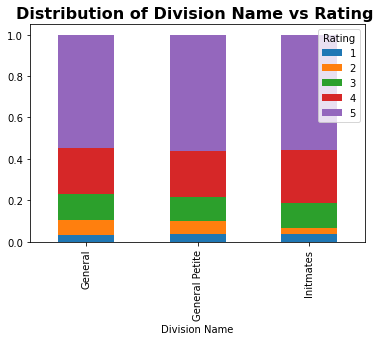

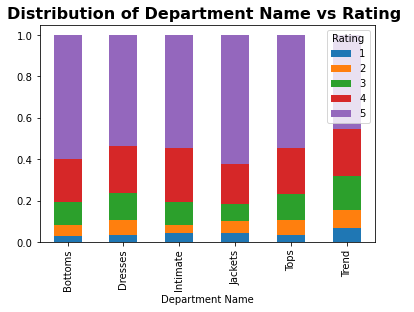

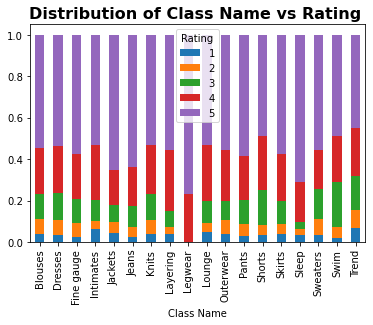

In [57]:
for x in cat_cols:
    y = pd.crosstab(data[x],data['Rating'])
    y.div(y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
    plt.title("Distribution of {} vs Rating ".format(x), fontsize=16, fontweight='bold')

In [58]:
#The lowest rating 1 & 2 are given to General products, while most 5 ratings are given to Intimates Trend clothes has lowest 5 ratings compared to another different department name Casual bottoms and chemises are giving the highest 4-star rating and don’t have any other rating that's strange.

Age Vs Rating

Text(0.5, 1.0, 'Age vs Rating')

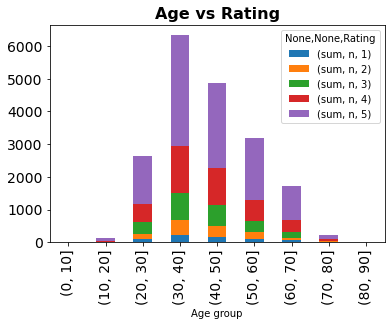

In [59]:
df=data.copy()
bins = np.arange(0,100,10)
df['Age group'] = pd.cut(df['Age'], bins)
df.columns
df= df.groupby(['Rating', df['Age group']]).size().reset_index(name='n')
df.columns
ratings_count_data_pivot = pd.pivot_table(df,index=["Age group"],
               values=["n"],
               columns=["Rating"],
               aggfunc=[np.sum])
ratings_count_data_pivot.plot(kind = 'bar', stacked=True, fontsize = 14)
plt.title('Age vs Rating', fontweight='bold', fontsize = 16)

Division, Department & Class Name Vs Age

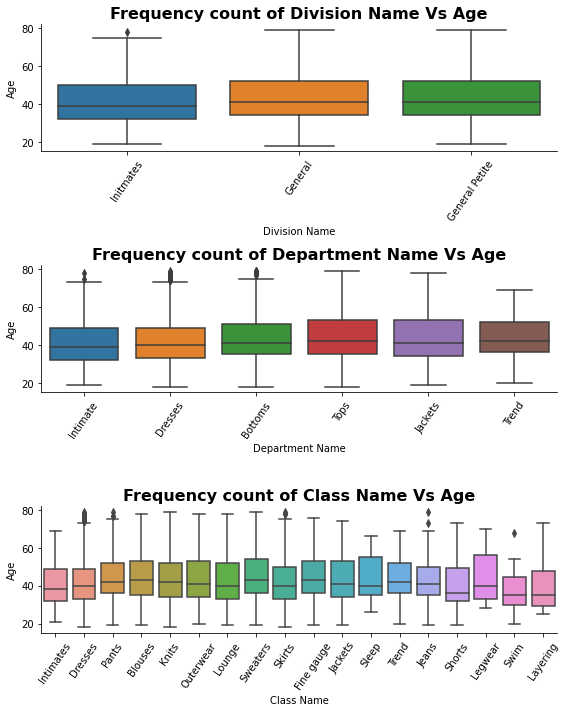

In [60]:
plt.figure(figsize=[8,10])
n=1
for x in cat_cols:
    plt.subplot(3,1,n)
    sns.boxplot(x=data[x], y='Age',data=data)
    sns.despine()
    plt.title("Frequency count of {} Vs Age".format(x), fontsize=16, fontweight='bold')
    plt.xticks(rotation=55)
    n=n+1
plt.tight_layout()
plt.show()

In [61]:
#People in the range of age of 30–40 are buying product frequently.

#Tops are brought by people having age of 60–70. Trendy clothes are not preferable by aged people.

#Swimsuit is brought by at age of around 90 which is pretty rare.

# ENCODING

In [62]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
a=['Division Name','Department Name','Class Name','Recommended IND']
for i in np.arange(len(a)):    
    data[a[i]] = label.fit_transform(data[a[i]])
data.head()

,Unnamed: 0,Clothing ID,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,2,2,3
1,1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,4,0,1,1
2,2,1077,60,I had such high hopes for this dress and reall...,3,0,0,0,1,1
3,3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,1,0,11
4,4,847,47,This shirt is very flattering to all due to th...,5,1,6,0,4,0


<AxesSubplot:>

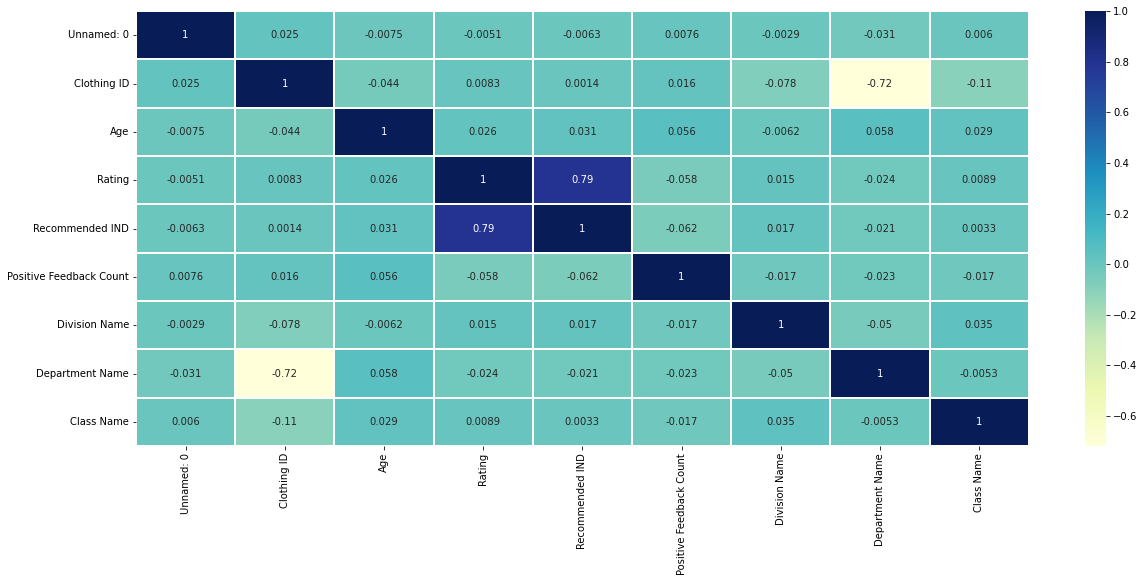

In [63]:
cor_matrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(cor_matrix,annot=True,linewidths=0.2,cmap='YlGnBu')

<AxesSubplot:>

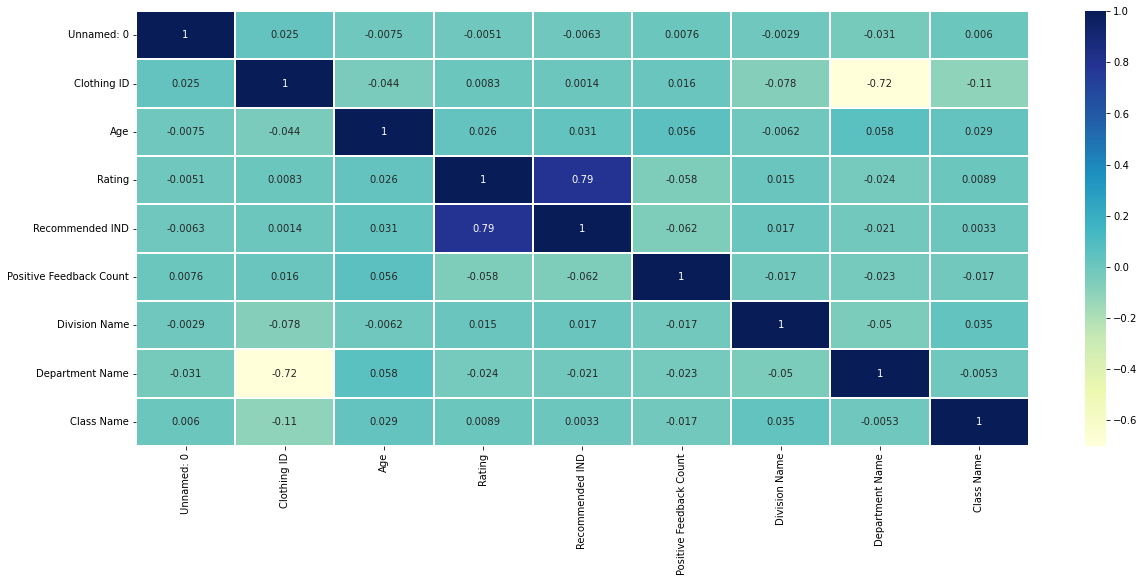

In [64]:
cor_matrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(cor_matrix,vmin=-0.7,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [65]:
data.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

# MODELLING
SPLITTING DATA

In [66]:
y=data['Recommended IND']
x=data.drop(['Recommended IND','Review Text'],axis=1)
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.2)
x.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Rating', 'Positive Feedback Count',
       'Division Name', 'Department Name', 'Class Name'],
      dtype='object')

In [67]:
x_train.shape

(15265, 8)

In [68]:
y_train.shape

(15265,)

In [69]:
x_test.shape

(3817, 8)

In [70]:
y_test.shape

(3817,)

# Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train, y_train) 
y_pred=logit_model.predict(x_test)

In [72]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred))
print("Recall is: ",recall_score(y_test,y_pred))
print("f1 score is: ",f1_score(y_test,y_pred))

Accuracy is:  0.9245480744039822
Precision is:  0.9435785536159601
Recall is:  0.9658583280153159
f1 score is:  0.9545884578997162


In [73]:
confusion_matrix(y_test,y_pred)

array([[ 502,  181],
       [ 107, 3027]], dtype=int64)

# KNN

In [74]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [75]:
acc_values

[0.7728582656536547,
 0.7361802462667016,
 0.792769190463715,
 0.7754781241812942,
 0.7998428084883417,
 0.792507204610951,
 0.8058684831019125,
 0.7987948650772858,
 0.8092742991878439,
 0.8027246528687451,
 0.8118941577154833,
 0.8087503274823159]

Text(0, 0.5, 'accuracy')

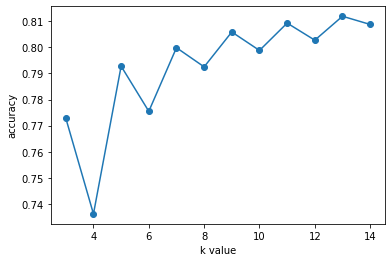

In [76]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [87]:
#fine tunning
#giving k value as 6
classifier=KNeighborsClassifier(n_neighbors=6,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred))
print("Recall is: ",recall_score(y_test,y_pred))
print("f1 score is: ",f1_score(y_test,y_pred))

Accuracy is:  0.7754781241812942
Precision is:  0.8270611893134157
Recall is:  0.9186343331206126
f1 score is:  0.8704459561602418


In [88]:
confusion_matrix(y_test,y_pred)

array([[  81,  602],
       [ 255, 2879]], dtype=int64)

# Decision Tree Classifier

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is: ",precision_score(y_test,y_pred))
print("Recall is: ",recall_score(y_test,y_pred))
print("f1 score is: ",f1_score(y_test,y_pred))

Accuracy is:  0.9179984280848834
Precision is:  0.9519384812560077
Recall is:  0.9479897894065092
f1 score is:  0.9499600319744205


In [84]:
y_test.value_counts()

1    3134
0     683
Name: Recommended IND, dtype: int64

In [85]:
confusion_matrix(y_test,y_pred)

array([[ 533,  150],
       [ 163, 2971]], dtype=int64)

# SUPPORT VECTOR MACHINE
Linear SVM

In [ ]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [89]:
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred))
print("Recall is :",recall_score(y_test,y_pred))
print("f1 score is :",f1_score(y_test,y_pred))

Accuracy is:  0.7754781241812942
Precision is : 0.8270611893134157
Recall is : 0.9186343331206126
f1 score is : 0.8704459561602418


In [90]:
confusion_matrix(y_test,y_pred)

array([[  81,  602],
       [ 255, 2879]], dtype=int64)

# Polynomial SVM

In [92]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)
print("Accuracy  is: ",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred))
print("Recall is :",recall_score(y_test,y_pred))
print("f1 score is :",f1_score(y_test,y_pred))

Accuracy  is:  0.8210636625622216
Precision is : 0.8210636625622216
Recall is : 1.0
f1 score is : 0.901740756725651


In [93]:
confusion_matrix(y_test,y_pred)

array([[   0,  683],
       [   0, 3134]], dtype=int64)

# Radial SVM

In [97]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)
print("Accuracy is: ",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred))
print("Recall is :",recall_score(y_test,y_pred))
print("f1 score is :",f1_score(y_test,y_pred))

Accuracy is:  0.8210636625622216
Precision is : 0.8210636625622216
Recall is : 1.0
f1 score is : 0.901740756725651


In [98]:
confusion_matrix(y_test,y_pred)

array([[   0,  683],
       [   0, 3134]], dtype=int64)

# RANDOM FOREST

In [99]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
print("Accuracy  is: ",accuracy_score(y_test,y_pred))
print("Precision is :",precision_score(y_test,y_pred))
print("Recall is :",recall_score(y_test,y_pred))
print("f1 score is: ",f1_score(y_test,y_pred))

Accuracy  is:  0.9365994236311239
Precision is : 0.9694805194805195
Recall is : 0.9527760051052967
f1 score is:  0.9610556807209527


In [100]:
confusion_matrix(y_test,y_pred)

array([[ 589,   94],
       [ 148, 2986]], dtype=int64)

We have tried out 5 different models and the accuracy scores for each of the model are as follows : Logistic regression:93% KNN:89% SVM:94%(linear),82%(polynomial and radial) Decisiontree classifier:92% random forest:93%

So the best model is Linear SVM.

# FINE TUNING
Hyperparameter tuning with GridSerach

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,5))
n_neighbors = list(range(3,4))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()

In [103]:
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(x_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 2
Best p: 1
Best n_neighbors: 3


In [104]:
classifier=KNeighborsClassifier(leaf_size=1,n_neighbors=3,metric="minkowski",p=1)
model=classifier.fit(x_train,y_train)
y_pred=model.predict(x_test)
confusion_matrix(y_test, y_test)

array([[ 683,    0],
       [   0, 3134]], dtype=int64)